In [1]:
%matplotlib inline



# Display sensitivity maps for EEG and MEG sensors

Sensitivity maps can be produced from forward operators that
indicate how well different sensor types will be able to detect
neural currents from different regions of the brain.

To get started with forward modeling see `tut-forward`.


In [2]:
# Author: Eric Larson <larson.eric.d@gmail.com>
#
# License: BSD (3-clause)

import mne
from mne.datasets import sample
import matplotlib.pyplot as plt

print(__doc__)

data_path = sample.data_path()

raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
fwd_fname = data_path + '/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif'

subjects_dir = data_path + '/subjects'

# Read the forward solutions with surface orientation
fwd = mne.read_forward_solution(fwd_fname)
mne.convert_forward_solution(fwd, surf_ori=True, copy=False)
leadfield = fwd['sol']['data']
print("Leadfield size : %d x %d" % leadfield.shape)

Automatically created module for IPython interactive environment
Reading forward solution from /Users/jose/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source ori

Compute sensitivity maps



In [3]:
grad_map = mne.sensitivity_map(fwd, ch_type='grad', mode='fixed')
mag_map = mne.sensitivity_map(fwd, ch_type='mag', mode='fixed')
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')

    204 out of 366 channels remain after picking
    102 out of 366 channels remain after picking
    60 out of 366 channels remain after picking
Adding average EEG reference projection.


Show gain matrix a.k.a. leadfield matrix with sensitivity map



RuntimeError: Could not load any valid 3D backend: ['mayavi', 'pyvista']

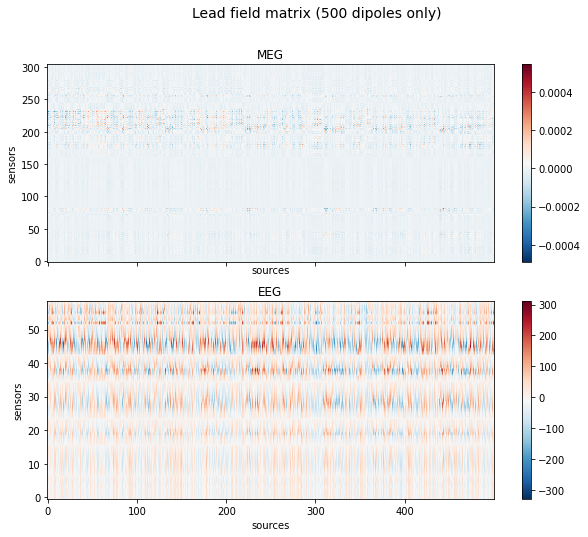

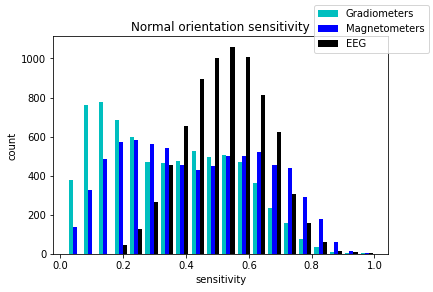

In [4]:
picks_meg = mne.pick_types(fwd['info'], meg=True, eeg=False)
picks_eeg = mne.pick_types(fwd['info'], meg=False, eeg=True)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Lead field matrix (500 dipoles only)', fontsize=14)
for ax, picks, ch_type in zip(axes, [picks_meg, picks_eeg], ['meg', 'eeg']):
    im = ax.imshow(leadfield[picks, :500], origin='lower', aspect='auto',
                   cmap='RdBu_r')
    ax.set_title(ch_type.upper())
    ax.set_xlabel('sources')
    ax.set_ylabel('sensors')
    fig.colorbar(im, ax=ax, cmap='RdBu_r')

fig_2, ax = plt.subplots()
ax.hist([grad_map.data.ravel(), mag_map.data.ravel(), eeg_map.data.ravel()],
        bins=20, label=['Gradiometers', 'Magnetometers', 'EEG'],
        color=['c', 'b', 'k'])
fig_2.legend()
ax.set(title='Normal orientation sensitivity',
       xlabel='sensitivity', ylabel='count')

grad_map.plot(time_label='Gradiometer sensitivity', subjects_dir=subjects_dir,
              clim=dict(lims=[0, 50, 100]))